# Sentimental Analysis Movie Review 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie_df=pd.read_csv('../input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')
movie_df=movie_df.sample(25000)
movie_df.head()

,review,sentiment
6852,"this is horrible film. it is past dumb. first,...",negative
10448,Two funeral directors in a Welsh village? Engl...,positive
36711,"This might contain a spoiler, so beware.<br />...",positive
16022,I am sitting here writing this review and the ...,negative
18559,well i wasn't sure what the film was going to ...,positive


In [3]:
movie_df.shape

(25000, 2)

data has 2 columns and the target column is sentiment

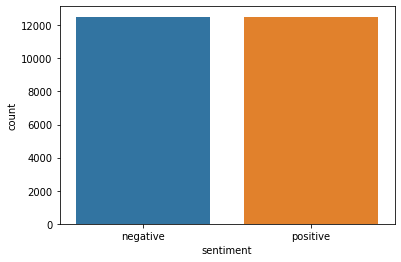

positive    12517
negative    12483
Name: sentiment, dtype: int64


In [4]:
sns.countplot(x='sentiment', data=movie_df)
plt.show()
print(movie_df.sentiment.value_counts())


In [5]:
movie_df['sentiment'] = np.where(movie_df['sentiment'] =='positive',1,movie_df['sentiment'])
movie_df['sentiment'] = np.where(movie_df['sentiment'] =='negative',0,movie_df['sentiment'])
print('The values present in sentiment are : {:}'.format(movie_df['sentiment'].unique()))
print(movie_df.sentiment.value_counts())

The values present in sentiment are : [0 1]
1    12517
0    12483
Name: sentiment, dtype: int64


In [6]:
movie_df['review']

6852     this is horrible film. it is past dumb. first,...
10448    Two funeral directors in a Welsh village? Engl...
36711    This might contain a spoiler, so beware.<br />...
16022    I am sitting here writing this review and the ...
18559    well i wasn't sure what the film was going to ...
                               ...                        
9041     This existential thriller, in Portuguese with ...
28237    I've found the movie offensive for Americans w...
73       I am not a golf fan by any means. On May 26 ab...
9817     We taped this when it aired on TV back in 1995...
2946     I generally like this movie a lot. The animati...
Name: review, Length: 25000, dtype: object

Here we could see, there are HTML tags are present in this text. So we need to remove those HTML tags and special charectors from the textual data of Review column

In [7]:
import re
def html_re(char):
    remove=re.compile('<.*?>')
    return re.sub(remove,'',char)

In [8]:
movie_df['review']=movie_df['review'].apply(html_re)
movie_df['review']

6852     this is horrible film. it is past dumb. first,...
10448    Two funeral directors in a Welsh village? Engl...
36711    This might contain a spoiler, so beware.If it ...
16022    I am sitting here writing this review and the ...
18559    well i wasn't sure what the film was going to ...
                               ...                        
9041     This existential thriller, in Portuguese with ...
28237    I've found the movie offensive for Americans w...
73       I am not a golf fan by any means. On May 26 ab...
9817     We taped this when it aired on TV back in 1995...
2946     I generally like this movie a lot. The animati...
Name: review, Length: 25000, dtype: object

HTML tags from review field are removed  by using the above defined function

In [9]:
def re_spl_char(char):
    a=''
    for i in char:
        if i.isalnum():
            a=a+i
        else:
            a=a+' '
    return a

In [10]:
movie_df['review']=movie_df['review'].apply(re_spl_char)
movie_df['review'][0]

'One of the other reviewers has mentioned that after watching just 1 Oz episode you ll be hooked  They are right  as this is exactly what happened with me The first thing that struck me about Oz was its brutality and unflinching scenes of violence  which set in right from the word GO  Trust me  this is not a show for the faint hearted or timid  This show pulls no punches with regards to drugs  sex or violence  Its is hardcore  in the classic use of the word It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary  It focuses mainly on Emerald City  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  Em City is home to many  Aryans  Muslims  gangstas  Latinos  Christians  Italians  Irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away I would say the main appeal of the show is due to the fact that it goes where other shows wo

Here removed all the special charecter present in review

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stopw=stopwords.words('english')
def re_stopw(char):
    x=[]
    for i in char.split():
        if i not in stopw:
            x.append(i)
    y=x[:]
    x.clear()
    return y

In [13]:
movie_df['review']=movie_df['review'].apply(re_stopw)
movie_df.head(10)

,review,sentiment
6852,"[horrible, film, past, dumb, first, thing, twi...",0
10448,"[Two, funeral, directors, Welsh, village, Engl...",1
36711,"[This, might, contain, spoiler, beware, If, 20...",1
16022,"[I, sitting, writing, review, movie, even, yet...",0
18559,"[well, sure, film, going, like, seen, little, ...",1
44950,"[Well, I, say, I, chance, see, show, Philadelp...",1
11684,"[As, I, TV, never, heard, mini, series, I, kno...",0
49754,"[Then, must, see, film, understand, reality, H...",1
28726,"[I, seen, film, numerous, times, life, I, cann...",1
2833,"[As, Michigander, I, got, Michigan, jokes, Ver...",0


In [14]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [15]:
y=[]
def stemw(char):
    for i in char:
        y.append(ps.stem(i))
    s=y[:]
    y.clear()
    return s    

In [16]:
movie_df['review']=movie_df['review'].apply(stemw)
movie_df

,review,sentiment
6852,"[horribl, film, past, dumb, first, thing, twin...",0
10448,"[two, funer, director, welsh, villag, english,...",1
36711,"[thi, might, contain, spoiler, bewar, if, 200,...",1
16022,"[i, sit, write, review, movi, even, yet, in, f...",0
18559,"[well, sure, film, go, like, seen, littl, clip...",1
...,...,...
9041,"[thi, existenti, thriller, portugues, english,...",1
28237,"[i, found, movi, offens, american, lost, someb...",0
73,"[i, golf, fan, mean, on, may, 26, 10, 30, pm, ...",1
9817,"[we, tape, air, tv, back, 1995, wait, year, re...",1


In [17]:
def unlist(char):
    return " ".join(char)

In [18]:
movie_df['review']=movie_df['review'].apply(unlist) 
movie_df

,review,sentiment
6852,horribl film past dumb first thing twin care l...,0
10448,two funer director welsh villag english humour...,1
36711,thi might contain spoiler bewar if 200 000 tho...,1
16022,i sit write review movi even yet in fact i che...,0
18559,well sure film go like seen littl clip think g...,1
...,...,...
9041,thi existenti thriller portugues english subti...,1
28237,i found movi offens american lost somebodi tow...,0
73,i golf fan mean on may 26 10 30 pm movi start ...,1
9817,we tape air tv back 1995 wait year releas quic...,1


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=6800)

In [20]:
X=cv.fit_transform(movie_df['review']).toarray()

In [21]:
X.shape

(25000, 6800)

In [22]:
y=movie_df.iloc[:,-1].values.astype('int')
y.shape

(25000,)

In [30]:
def sentimental_model(indep_feature,target_feature):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
    from sklearn.metrics import accuracy_score
    
    X_train,X_test,y_train,y_test=train_test_split(indep_feature,target_feature,test_size=.25,random_state=0)
    print("Shape of Training Data,X : {:}".format(X_train.shape))
    print("Shape of Training Data, y : {:}".format(y_train.shape))
    print("Shape of Test Data, X : {:}".format(X_test.shape))
    print("Shape of Test Data, y : {:}".format(y_test.shape))
    print()
    
    GNB=GaussianNB()
    MNB=MultinomialNB()
    BNB=BernoulliNB()
    G=GNB.fit(X_train,y_train)
    M=MNB.fit(X_train,y_train)
    B=BNB.fit(X_train,y_train)
    
    y_predG=GNB.predict(X_test)
    y_predM=MNB.predict(X_test)
    y_predB=BNB.predict(X_test)
     
    asG=accuracy_score(y_test,y_predG)
    asM=accuracy_score(y_test,y_predM)
    asB=accuracy_score(y_test,y_predM)

    print('Accuracy score for Gaussian : {:%}'.format(asG))
    print('Accuracy score for Multinomial : {:%}'.format(asM))
    print('Accuracy score for Bernoulli : {:%}'.format(asB))
    
    return

In [31]:
sentimental_model(X,y)

Shape of Training Data,X : (18750, 6800)
Shape of Training Data, y : (18750,)
Shape of Test Data, X : (6250, 6800)
Shape of Test Data, y : (6250,)

Accuracy score for Gaussian : 68.976000%
Accuracy score for Multinomial : 84.432000%
Accuracy score for Bernoulli : 84.432000%
